In [22]:
# import des librairies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re as re
# import pdfminer
from collections import Counter
import seaborn as sns


# Import de librairies pour TextMining 
## possible qu'il faille importer avec pip ou dans anaconda des librairies

import re
import nltk
import heapq
import nltk
# nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.data import load
from nltk.tokenize.treebank import TreebankWordTokenizer


In [23]:

# Importer le dataset
# dataset = pd.read_csv('Etats_Americains.csv')

dataset = pd.read_excel('Etats_Americains.xlsx', sheet_name='etats_americains')

In [20]:
#Rapide résumé du dataframe: nombre de lignes et nombre de colonnes 
dataset.shape



(51, 9)

In [21]:
# Connaitre le nom des colonnes
dataset.columns

list(dataset.columns.values)

['Etat',
 'Population_totale',
 'Immigration_domestique_nette',
 'Américains_migrants_avec_letranger',
 'Immigration_internationale_nette',
 'Taux_de_naissance',
 'Taux_mortalité',
 'Pop_inf_65ans',
 'Pop_sup65ans']

In [24]:
# Visualiser les premières lignes
dataset.head()

,Etat,Population_totale,Immigration_domestique_nette,Américains_migrants_avec_letranger,Immigration_internationale_nette,Taux_de_naissance,Taux_mortalité,Pop_inf_65ans,Pop_sup65ans
0,Alabama,4464356,-1.784356,-0.021952,0.689685,14.407229,10.284126,869.212939,130.787061
1,Alaska,634892,-1.718402,-0.239411,2.094844,15.952319,4.644884,941.949182,58.050818
2,Arizona,5307331,14.250666,-0.033915,4.294814,15.882748,7.766050,869.535365,130.464635
3,Arkansas,2692090,0.358086,-0.013373,1.069429,14.349075,10.507078,861.061480,138.938520
4,California,34501130,-2.014398,-0.043912,7.879191,15.371931,6.715519,894.028746,105.971254


In [25]:
# Type des colonnes
dataset.dtypes

Etat                                   object
Population_totale                       int64
Immigration_domestique_nette          float64
Américains_migrants_avec_letranger    float64
Immigration_internationale_nette      float64
Taux_de_naissance                     float64
Taux_mortalité                        float64
Pop_inf_65ans                         float64
Pop_sup65ans                          float64
dtype: object

In [26]:
# Visualiser échantillon de données
dataset.head(10)

,Etat,Population_totale,Immigration_domestique_nette,Américains_migrants_avec_letranger,Immigration_internationale_nette,Taux_de_naissance,Taux_mortalité,Pop_inf_65ans,Pop_sup65ans
0,Alabama,4464356,-1.784356,-0.021952,0.689685,14.407229,10.284126,869.212939,130.787061
1,Alaska,634892,-1.718402,-0.239411,2.094844,15.952319,4.644884,941.949182,58.050818
2,Arizona,5307331,14.250666,-0.033915,4.294814,15.882748,7.766050,869.535365,130.464635
3,Arkansas,2692090,0.358086,-0.013373,1.069429,14.349075,10.507078,861.061480,138.938520
4,California,34501130,-2.014398,-0.043912,7.879191,15.371931,6.715519,894.028746,105.971254
5,Colorado,4417714,9.317941,-0.057269,3.574473,14.568168,6.263420,903.517521,96.482479
6,Connecticut,3425074,-2.365496,-0.017518,3.495983,12.524693,8.998346,862.638880,137.361120
7,Delaware,796165,5.393354,-0.040193,2.123932,14.014683,8.793403,869.446660,130.553340
8,District of Columbia,571822,-7.771649,-0.073449,5.727307,14.327885,10.763839,880.753101,119.246899
9,Florida,16396515,12.521136,-0.034702,5.763359,12.543824,10.128311,826.277840,173.722160


In [28]:
#IMPORT DES LIBRAIRIES
import numpy as np
import matplotlib.pyplot as mplt
import pandas as pd
import seaborn as sbrn
import statsmodels as stat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Construction des X et Y, la target
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Apprehension du jeu de données
print(dataset.shape)
print(dataset.head(5))
print(dataset.columns)

(51, 9)
         Etat  Population_totale  Immigration_domestique_nette  \
0     Alabama            4464356                     -1.784356   
1      Alaska             634892                     -1.718402   
2     Arizona            5307331                     14.250666   
3    Arkansas            2692090                      0.358086   
4  California           34501130                     -2.014398   

   Américains_migrants_avec_letranger  Immigration_internationale_nette  \
0                           -0.021952                          0.689685   
1                           -0.239411                          2.094844   
2                           -0.033915                          4.294814   
3                           -0.013373                          1.069429   
4                           -0.043912                          7.879191   

   Taux_de_naissance  Taux_mortalité  Pop_inf_65ans  Pop_sup65ans  
0          14.407229       10.284126     869.212939    130.787061  
1       

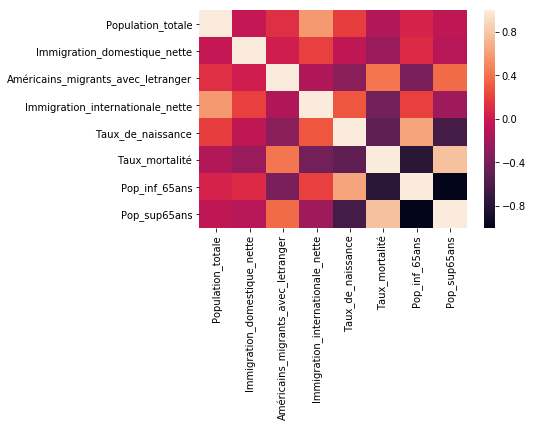

In [30]:
# Corrélation entre les données
corr = dataset.corr()
sns.heatmap(corr)

In [31]:
# Modification du jeu de données
## Choix des données ayant une grande corrélation

data_pop  = dataset.drop(['Immigration_domestique_nette', 'Américains_migrants_avec_letranger','Immigration_internationale_nette'], axis=1)
data_migrant  = dataset.drop(['Taux_de_naissance', 'Taux_mortalité','Pop_inf_65ans', 'Pop_sup65ans'], axis=1)
data_etat  = dataset.drop(['Immigration_domestique_nette', 'Américains_migrants_avec_letranger','Immigration_internationale_nette','Taux_de_naissance', 'Taux_mortalité','Pop_inf_65ans', 'Pop_sup65ans'], axis=1)


dataset = data_pop

In [32]:

# removing null values to avoid errors  
dataset.dropna(inplace = True)  

# percentile list 
perc =[.20, .40, .60, .80] 

# list of dtypes to include 
include =['object', 'float', 'int64'] 

# calling describe method 
description = dataset.describe(percentiles = perc, include = include) 

            Etat  Population_totale  Taux_de_naissance  Taux_mortalité  \
count         51       5.100000e+01          51.000000       51.000000   
unique        51                NaN                NaN             NaN   
top     New York                NaN                NaN             NaN   
freq           1                NaN                NaN             NaN   
mean         NaN       5.584253e+06          13.864436        8.732639   
std          NaN       6.263147e+06           1.735674        1.389106   
min          NaN       4.944230e+05          10.313445        4.644884   
20%          NaN       1.259181e+06          12.543824        7.697252   
40%          NaN       2.858029e+06          13.627164        8.654809   
50%          NaN       4.063011e+06          13.938746        8.903040   
60%          NaN       4.972294e+06          14.164426        9.193188   
80%          NaN       8.186268e+06          14.874741        9.789612   
max          NaN       3.450113e+07   

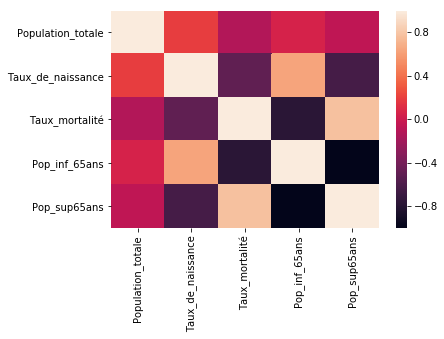

In [13]:
# Corrélation entre les données
corr = dataset.corr()
sns.heatmap(corr)

print(description)

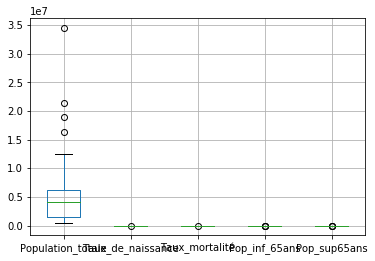

In [14]:
# Boxplot Population Totale
import matplotlib.pyplot as plt
dataset.boxplot()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021670EAC240>,
      dtype=object)

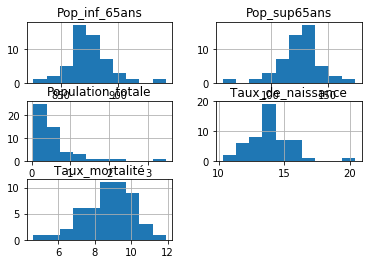

In [15]:
dataset.hist()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216718F5A90>


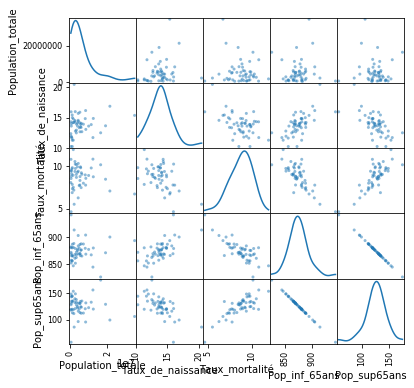

In [33]:
# scatter_matrix
## Matrice de dispersion
from pandas.plotting import scatter_matrix
print(scatter_matrix(dataset, alpha=0.5, figsize=(6, 6), diagonal='kde'))

In [34]:
# Calcul du Chi2
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
print(dataset)
stat, p, dof, expected = chi2_contingency(dataset)
#print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

                    Etat  Population_totale  Taux_de_naissance  \
0                Alabama            4464356          14.407229   
1                 Alaska             634892          15.952319   
2                Arizona            5307331          15.882748   
3               Arkansas            2692090          14.349075   
4             California           34501130          15.371931   
5               Colorado            4417714          14.568168   
6            Connecticut            3425074          12.524693   
7               Delaware             796165          14.014683   
8   District of Columbia             571822          14.327885   
9                Florida           16396515          12.543824   
10               Georgia            8383915          16.156295   
11                Hawaii            1224398          15.437791   
12                 Idaho            1321006          14.999175   
13              Illinois           12482301          14.874741   
14        

TypeError: '<' not supported between instances of 'str' and 'int'